# 3.- Optimizers

In this tutotial, we will learn how to use Optimizers module in Nauyaca.
Optimizers are helpful algorithms that quickly explore the parameter space and search approximate solutions to the mid-transit fitting through minimizing a $\chi^2$ statistic.

Optimizers module join many methods namely, Differential Evolution, Powell and Nelder-Mead minimization methods to track solutions that best reproduce the TTVs.

In [1]:
import nauyaca as nau

Along this tutorial we'll also make some plots to visualize the results to understand what the optimizers are doing. Thus, let's import the library matplotlib

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

## 3.1 Loading the Planetary System

In the previous tutorial we create a Planetary System object (named SystemX) that was saved in **pickle** and **json** formats. These files contain all the information about the planetary system. As described there, both formats have pros and cons. Hence, saving both formats is strongly recommended.


Let's see how these formats can be loaded to rebuilt the Planetary System saved before. To do that, we call again the PlanetarySystem module inside Nauyaca, and load the respective files as follows:

**Loading from pickle:**

In [3]:
PS = nau.PlanetarySystem.load_pickle('SystemX.pkl')

print(PS) # print to see the saved object


 =========== Planetary System Summary =========== 
--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06

System: SystemX
Mstar: 0.9132 Msun |  Rstar: 0.8632 Rsun
Number of planets: 2
Planet information:
------
Planet1: Planet-b
  Boundaries:
    mass: (1, 50.0)  [M_earth]
    period: (5.35, 5.36)  [d]
    ecc: (1e-06, 0.2)   
    inclination: (90, 90)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (88.36, 88.36)  [deg]
  TTVs: True
------
Planet2: Planet-c
  Boundaries:
    mass: (1, 50)  [M_earth]
    period: (11.83, 11.84)  [d]
    ecc: (1e-06, 0.2)   
    inclination: (90, 90)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (70, 110.0)  [deg]
  TTVs: True

Simulation attributes: 
Reference epoch of the solutions (t0): 0.0 [JD]
Total time of TTVs data (ftime): 221 [days]
Timestep of the simul

**Loading from json:**

In [4]:
PS = nau.PlanetarySystem.load_json('SystemX.json')

print(PS) # print to see the saved object

--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06

 =========== Planetary System Summary =========== 
--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06

System: SystemX
Mstar: 0.9132 Msun |  Rstar: 0.8632 Rsun
Number of planets: 2
Planet information:
------
Planet1: Planet-b
  Boundaries:
    mass: (1, 50.0)  [M_earth]
    period: (5.35, 5.36)  [d]
    ecc: (1e-06, 0.2)   
    inclination: (90, 90)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (88.36, 88.36)  [deg]
  TTVs: True
------
Planet2: Planet-c
  Boundaries:
    mass: (1, 50)  [M_earth]
    period: (11.83, 11.84)  [d]
    ecc: (1e-06, 0.2)   
    inclination: (90, 90)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (70, 110.0)  [deg]

In both cases the Planetary system is rebuild with the previous saved parameters. Choose whatever of these two options, although I recommend the json format since it's independent of the nauyaca version.

## 3.2 Running the optimizers

Now is time to run the optimizers. Let's initialize the simulation by passing the Planetary System  object we want to analize, the number of solutions to reach and the number of cores to run in parallel

In [5]:
# Instantiating Optimizers
optim = nau.Optimizers(PS, nsols=250, cores=8)

To run it, jus call .run method. Running in parallel is recommended.

In [6]:
# Running Optimizers
opt_solutions = optim.run()


 =========== OPTIMIZATION ===========

--> Starting date:  2021-08-09 19:50
--> Finding 250 solutions using 8 cores
--> Results will be saved at:
     * ./SystemX_cube.opt (normalized)
     * ./SystemX_phys.opt (physical)
--> Reference time of the solutions: 0.0 [days]
- - - - - - - - - - - - - - - - - - - - -
Solution  |   chi square from optimizers
- - - - - - - - - - - - - - - - - - - - -
 2 |  36911577.441  -->  79123.657  -->  2258.653
 3 |  8377070.578  -->  26130.196  -->  3628.372
 6 |  9065291.800  -->  741883.769  -->  1336.024
 7 |  38265327.786  -->  1983333.574  -->  3452.852
 8 |  7582440.600  -->  210721.562  -->  2159.748
 4 |  4169754.368  -->  57760.660  -->  1310.359
 5 |  27808090.162  -->  1471273.375  -->  38670.452
 10 |  2118336.175  -->  332876.531  -->  7110.654
 9 |  21415157.065  -->  368278.090  -->  1640.869
 14 |  7839497.750  -->  49969.904  -->  2354.124
 11 |  13280411.652  -->  2658052.377  -->  8539.309
 1 |  5300058.003  -->  581365.366  -->  58038

 147 |  5285700.316  -->  499044.345  -->  6667.572
 152 |  19567707.167  -->  1934367.888  -->  4658.290
 149 |  72996734.242  -->  889432.462  -->  1377.785
 154 |  4186918.783  -->  51194.201  -->  449.970
 153 |  3672180.997  -->  1378126.230  -->  182460.927
 155 |  10699430.289  -->  1087270.530  -->  1930.269
 157 |  5262272.263  -->  366297.760  -->  94211.517
 159 |  5450312.484  -->  428333.042  -->  1437.612
 156 |  3101053.249  -->  1560243.673  -->  47825.113
 163 |  45730445.425  -->  1144908.948  -->  1618.483
 162 |  2418935.276  -->  380536.221  -->  1885.364
 160 |  5767397.810  -->  554745.063  -->  88587.711
 158 |  17203895.717  -->  1289094.568  -->  59831.112
 165 |  2253356.300  -->  1002554.616  -->  3614.515
 151 |  5657847.813  -->  299209.110  -->  298.655
 170 |  32948917.332  -->  102108.523  -->  1751.368
 166 |  11282315.835  -->  2193035.442  -->  1770985.965
 164 |  13639764.407  -->  210412.866  -->  5284.816
 161 |  33241918.495  -->  542883.082  -->

The output provides a general outlook of the progressive $\chi^2$ minimization: for each solution, the sequence show the $\chi^2$ of the best solution found for the algorithms Differential Evolution (DE), Powell (PW), and Nelder-Mead (NM). Nauyaca takes the last result (NM) as the final solution of each run.

At this point, results have been saved in two files with extension **.opt**, with the following suffixes:

* **_cube.opt:** The results from  optimizers are normalized between 0 and 1, which correspond to the lower and upper boundaries, respectively. This file will be useful for the MCMC (next tutorial).

* **_phys.opt:** The results from optimizers are saved in physical values. This can be used by users to visualize the physical results.

These are saved in the current directory, starting with the Planetary System name, you can take a look! Each row in these files are the solutions, being the first element the $\chi^2$ and the rest are the planetary parameters of the first planet concatenated with planetary parameters of the next planet(s). A flag in column chi2 with values greater than 1e+20 could rise if the minimizers could not find a solution.

## 3.3 Accessing to results

### 3.3.1 Results as arrays

Even though the results have been saved, we can access to these solutions trough the variable assigned to the optimizers run:

In [7]:
opt_solutions

{'chi2': array([4.50912127e+01, 1.23927547e+02, 2.25229904e+02, 2.46429806e+02,
        2.66634914e+02, 2.98654774e+02, 3.18369213e+02, 3.75923704e+02,
        4.00527509e+02, 4.49970307e+02, 4.61373753e+02, 5.39562838e+02,
        5.45238999e+02, 6.29341555e+02, 7.47558817e+02, 7.61589166e+02,
        7.98447387e+02, 9.41984738e+02, 1.02195456e+03, 1.02565212e+03,
        1.02872651e+03, 1.05657293e+03, 1.05748500e+03, 1.12934648e+03,
        1.15153383e+03, 1.16067188e+03, 1.17799959e+03, 1.19162109e+03,
        1.26985094e+03, 1.31035942e+03, 1.31060493e+03, 1.33602439e+03,
        1.35093359e+03, 1.37778463e+03, 1.43563657e+03, 1.43685489e+03,
        1.43761220e+03, 1.44827811e+03, 1.44865841e+03, 1.47230471e+03,
        1.50424440e+03, 1.51457297e+03, 1.59132876e+03, 1.60793400e+03,
        1.60965298e+03, 1.61848267e+03, 1.64086887e+03, 1.64461329e+03,
        1.65211366e+03, 1.70486414e+03, 1.75136845e+03, 1.77023499e+03,
        1.77121944e+03, 1.80189413e+03, 1.83393917e+03, 

or, through the .results method of Optimizers

In [8]:
optim.results

{'chi2': array([4.50912127e+01, 1.23927547e+02, 2.25229904e+02, 2.46429806e+02,
        2.66634914e+02, 2.98654774e+02, 3.18369213e+02, 3.75923704e+02,
        4.00527509e+02, 4.49970307e+02, 4.61373753e+02, 5.39562838e+02,
        5.45238999e+02, 6.29341555e+02, 7.47558817e+02, 7.61589166e+02,
        7.98447387e+02, 9.41984738e+02, 1.02195456e+03, 1.02565212e+03,
        1.02872651e+03, 1.05657293e+03, 1.05748500e+03, 1.12934648e+03,
        1.15153383e+03, 1.16067188e+03, 1.17799959e+03, 1.19162109e+03,
        1.26985094e+03, 1.31035942e+03, 1.31060493e+03, 1.33602439e+03,
        1.35093359e+03, 1.37778463e+03, 1.43563657e+03, 1.43685489e+03,
        1.43761220e+03, 1.44827811e+03, 1.44865841e+03, 1.47230471e+03,
        1.50424440e+03, 1.51457297e+03, 1.59132876e+03, 1.60793400e+03,
        1.60965298e+03, 1.61848267e+03, 1.64086887e+03, 1.64461329e+03,
        1.65211366e+03, 1.70486414e+03, 1.75136845e+03, 1.77023499e+03,
        1.77121944e+03, 1.80189413e+03, 1.83393917e+03, 

In both cases it will return a dictionary containing arrays for the $\chi^2$ and the corresponding solutions in both ways: normalized ('cube') and physical values ('physical'). Here, the $\chi^2$ is ordered from lower to greater value (best to worse solution), but also the solutions (cube or physical) are ordered accordingly. 

What can we do with this information?

Let's for example, find **the best solution**. Since the .results method return the results ordered by $\chi^2$, let's take the first element (index 0) of 'chi2' and 'physical':

In [9]:
best_chi2 = optim.results['chi2'][0]
best_sol  = optim.results['physical'][0]

print("Best solution found by optimizers: \n")
print(f"Best chi2:\n    {best_chi2}")
print(f"Best solution:\n {best_sol}")

Best solution found by optimizers: 

Best chi2:
    45.09121274544064
Best solution:
 [6.15270330e+00 5.35464631e+00 1.13278221e-01 2.91793202e+02
 2.24144689e+01 3.36046070e+01 1.18332921e+01 8.81504257e-02
 1.91859504e+02 8.37182011e+01 9.71786455e+01]


Okay, but what these numbers mean? Elements of the array(s) are the planet parameters ordered as specified int Planetary system attribute -params_names-

In [10]:
# Parameter names
PS.params_names

'mass1  period1  ecc1  argument1  mean_anomaly1  mass2  period2  ecc2  argument2  mean_anomaly2  ascending_node2'

Note that elements in .params_names contains numbers at the end (1, 2,..), which refer to **the entry order of the planets in the system**. That is why the ordering is important when creating the Planetary System! Anyway, if you do not remember the order, we can find it out:

In [11]:
for planet, index in PS.planets_IDs.items():
    print(f"{planet}: {index+1}")

Planet-b: 1
Planet-c: 2


### 3.3.2 Results as a dictionary

There's another useful way of getting the results, where all the solutions are grouped by planet parameters. Let's access through:

In [12]:
results_grouped = optim.results_dict
results_grouped

{'mass1': array([ 6.1527033 ,  2.9685119 ,  7.20505288,  6.03673041, 12.80897908,
         5.89517799,  5.11786116,  5.57596871, 15.85226609,  9.25654539,
         4.07702043,  4.50985486,  9.91235307,  6.10068078,  7.31246533,
        18.30602077,  9.92764912,  2.92803554, 26.97648617, 16.22297978,
        11.60908188, 16.59733982,  1.01454602,  9.42520363, 13.46390471,
        11.90440841, 34.23864486, 20.8863964 , 35.15764057, 15.43530886,
        25.81064965, 19.74756029, 19.69402517, 20.87395374,  4.42482418,
         9.09953137,  5.41755776, 29.41034378,  3.20822714, 41.25444312,
        27.92043865, 20.99080494, 19.2730575 , 31.78998367, 25.01301373,
         6.66327651,  1.07799112, 27.69711047, 10.68564942, 27.23632686,
        19.22168842, 15.20885527, 11.99392121, 28.83155481, 22.92454462,
        13.61830971, 17.62433147, 17.95270821, 13.12961013,  6.08291583,
        15.61696688, 10.61146223,  9.8867525 , 33.33669366, 21.57497502,
        24.77726374, 19.02750333, 30.79566

Now, all the solutions of independet parameters are available! Note that there's also a 'chi2' key, that collects the $\chi^2$ of the individual parameter solutions. 

## 3.4 Visualizing the results

Let's use the information from optimizers to make interesting plots. But first, let's import numpy to manage arrays

In [13]:
import numpy as np

### Plotting distributions

Let's visualize the results of individual parameters by plotting histograms

Text(0.5, 0, 'mass1')

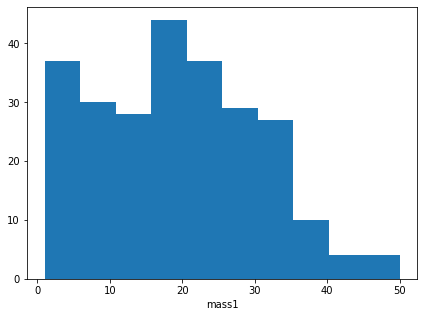

In [14]:
plt.figure(figsize=(7,5))

param = 'mass1'

plt.hist(results_grouped[param]);
plt.xlabel(param)

### Plotting parameter pairs

Let's plot the parameter space of two parameters with the aim of visualizing the regions where the optimizers found solutions. The colors will correspond to $\log_{10}(\chi^2)$.  Low values of $\chi^2$ correspond to better solutions in the minimization process so they are preferred.
Using the color map 'inferno_r', the yellow colors correspond to the best solutions and black to the worse. Also remember that the valid parameter names are:

In [15]:
PS.params_names.split()

['mass1',
 'period1',
 'ecc1',
 'argument1',
 'mean_anomaly1',
 'mass2',
 'period2',
 'ecc2',
 'argument2',
 'mean_anomaly2',
 'ascending_node2']

Let's plot some solutions from optimizers and the true solution as a cyan star

Text(0, 0.5, 'mass2')

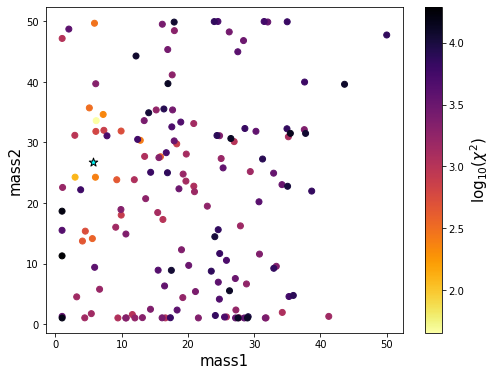

In [18]:
plt.figure(figsize=(8,6))

# Try changing these parameters
x = 'mass1'
y = 'mass2'

n = 150

chi2 = results_grouped['chi2'][:n]
plt.scatter(results_grouped[x][:n], results_grouped[y][:n], 
            c=np.log10(chi2), 
            vmin=np.log10(min(chi2)), vmax=np.log10(max(chi2)), cmap='inferno_r')
plt.colorbar().set_label(r"$\log_{10} (\chi^2)$",fontsize=15)

# Plot the true mass
plt.scatter(5.66468,  26.85598, color='cyan', marker='*', s=80, edgecolors='black')

plt.xlabel(x,fontsize=15)
plt.ylabel(y,fontsize=15)

Can you identify those solutions around the true solution for masses (cyan star)?

### Plotting the TTVs

Let's plot many solutions from the optimizer and compare them with the observed TTVs. To do so, Nauyaca contains a built-in function to visualize TTVs through the Plots module. 

Provide the Planetary System object to initialize the module:

In [19]:
nauplot = nau.Plots(PS,sns_style='white')

Now, use the .TTVs() function to pass a list of the solution(s) to plot ($without$ the information of $\chi^2$). Let's plot, for example, the best 5 out of the 100 solutions found by the optimizers:

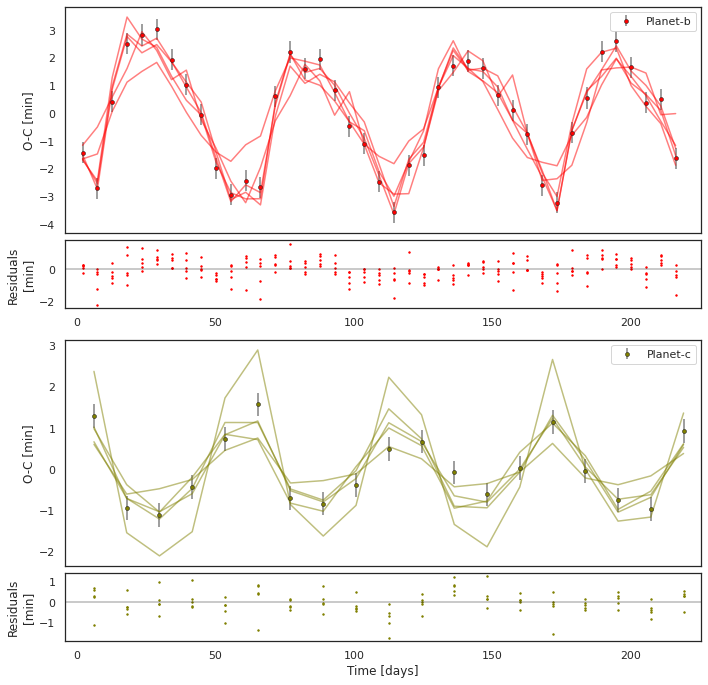

In [20]:
nauplot.TTVs(flat_params=opt_solutions['physical'][:5])

plt.savefig("TTVs_optimizer.png") # Save

Ok, that does not look like an ideal fit. Results from the optimizers provide a fast way of getting approximate solutions. They also allow us to have an overall outlook of the solutions in the parameter space. To increase the chance of getting better solutions, just increase the number of solutions 'nsols' in nau.Optimizers(). 

**Even so, the results from optimizers carry valuable information that can be used in the MCMC. We'll see how to use this information to start the MCMC in the next tutorial. See you there!**

____________________________________